In [190]:
from model import Module, Sequential
from activation import ReLU, Tanh, MSELoss
from linear import Linear
from disc_generator import generate_disc_set, plot_set

In [206]:
class Optimizer(object):
    def __init__(self, parameters):
        self.parameters = parameters
        
    def step(self): 
        raise NotImplementedError

    def zero_gradient(self):
        for p in self.parameters:
            p.grad = None      
            
class SGD(Optimizer):
    def __init__(self, parameters, lr = .001, momentum = .999, weight_decay = 1e-4):
        super().__init__(parameters)
        self.lr           = lr
        self.weight_decay = weight_decay
        self.momentum     = momentum
        self.velocity     = []


    def step(self):
        for p,v in zip(self.parameters, self.velocity):
            v = self.momentum * v + p.grad 
            p.data = p.data-self.lr * v

In [133]:
train_input, train_target, test_input, test_target, test_mask, train_mask = generate_disc_set(1000)

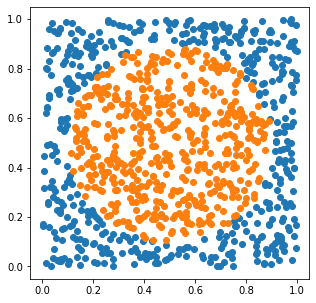

In [134]:
plot_set(train_input, train_mask)

In [135]:
input_units = 2
output_units = 2
hidden_units = 25
nb_epochs = 1000
mini_batch_size = 100
eta = 1e-3
momentum = 0.9
weight_decay = 1e-4

In [207]:
def train_model(model, train_input, train_target, nb_epochs, mini_batch_size, criterion=MSELoss(), eta = 1e-3):
    optim = SGD(model.parameters)
    for e in range(nb_epochs):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            # forward pass
            output = model.forward(train_input.narrow(0, b, mini_batch_size))
            loss = criterion.forward(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss += loss.item()
            
            optim.zero_gradient()
          
        
    
        
        #output = model.forward(train_input)

In [148]:
mini_model = Sequential(
                        Linear(input_units, hidden_units),
                        Tanh(),
                        Linear(hidden_units, hidden_units),
                        Tanh(),
                        Linear(hidden_units, output_units),
                        Tanh())

In [208]:
train_model(mini_model, train_input, train_target, nb_epochs, mini_batch_size, eta  = eta)

TypeError: 'method' object is not iterable